## Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

**Problem:** Predict purchase amount

## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#firstly , we import all the libraries which are we need.

## Loading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()
# read the dataset and returns the first n rows (defaults)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [65]:
# statistical info
df.describe()
#It includes count, mean, standard deviation, minimum, maximum, and quartile values for all numerical columns in the DataFrame.

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [34]:
# datatype info
df.info()
# gives dataframe information such as the number of non-null values, data type of each column, and memory utilization.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [3]:
# find unique values
df.apply(lambda x: len(x.unique()))
#Using the len(x.unique()) method, the lambda function takes each column x as input and returns the number of unique values in that column. 

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Purchase', ylabel='Density'>

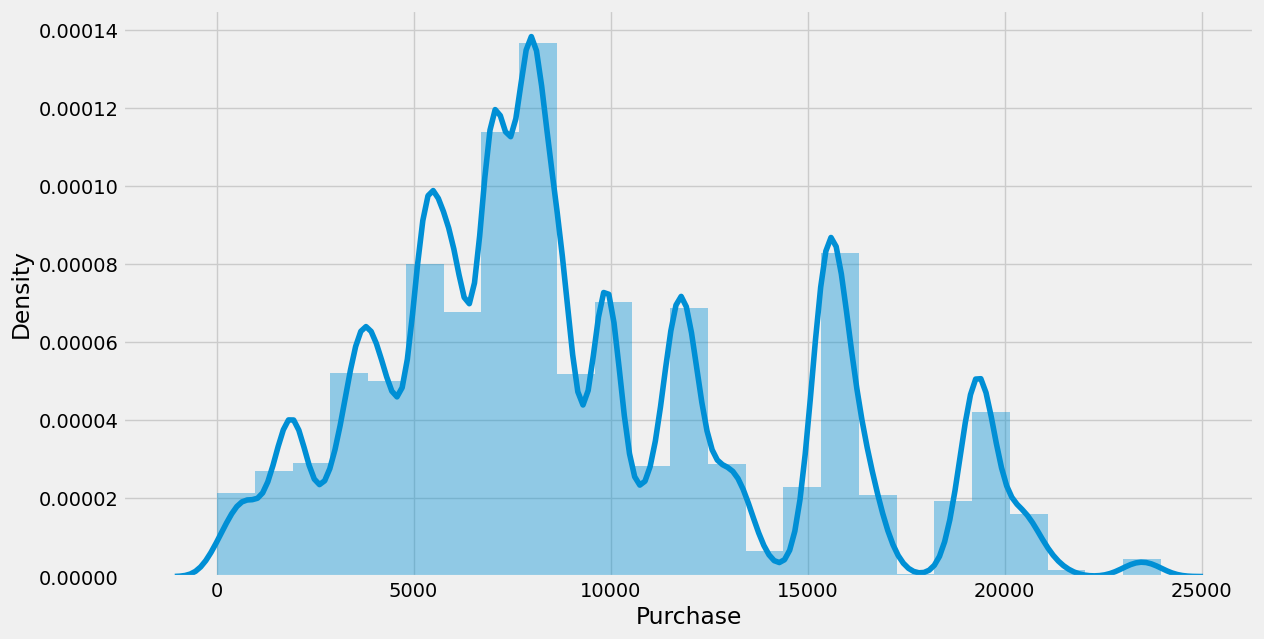

In [36]:
# distplot for purchase
plt.style.use('fivethirtyeight')
# changes the plot's style to 'fivethirtyeight'.
plt.figure(figsize=(13, 7))
# makes the plot figure 13 inches by 7 inches in size.
sns.distplot(df['Purchase'], bins=25)
#generates a histogram with the 'Purchase' column as the data and 25 bins to arrange the data into. 
# The resultant figure depicts the frequency of occurrence of purchase amounts in the data, with the x-axis indicating the buy amount and the y-axis reflecting the frequency of occurrence for each purchase amount.

<Axes: xlabel='Gender', ylabel='count'>

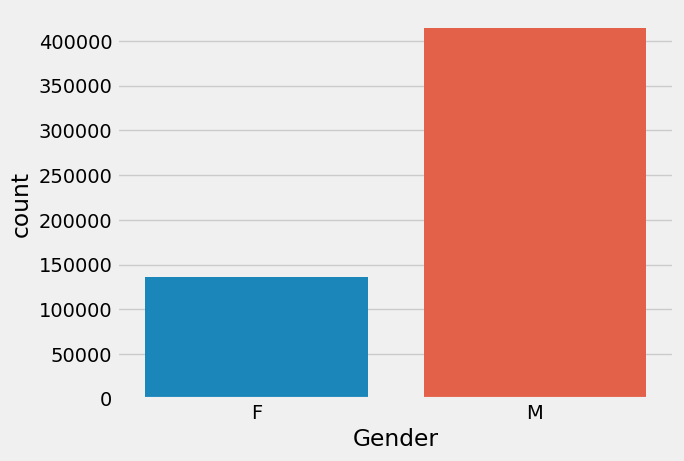

In [11]:
# distribution of numeric variables
sns.countplot(x='Gender', data=df)


<Axes: xlabel='Age', ylabel='count'>

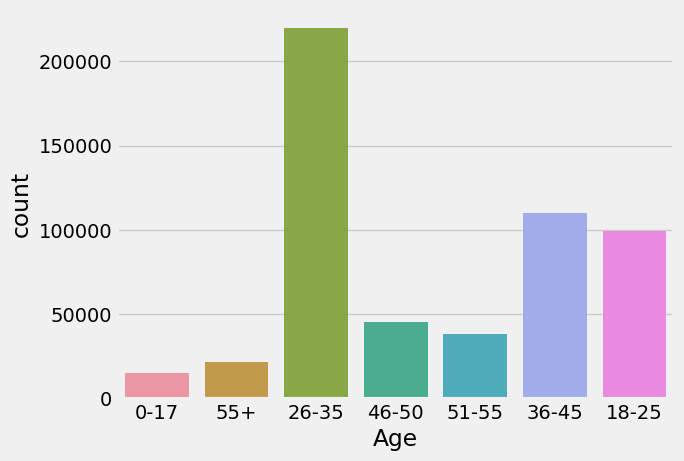

In [12]:
sns.countplot(x='Age' , data=df)
#This code creates a countplot of the 'Age' column in the dataframe 'df', showing the distribution of values in this column.

<Axes: xlabel='Marital_Status', ylabel='count'>

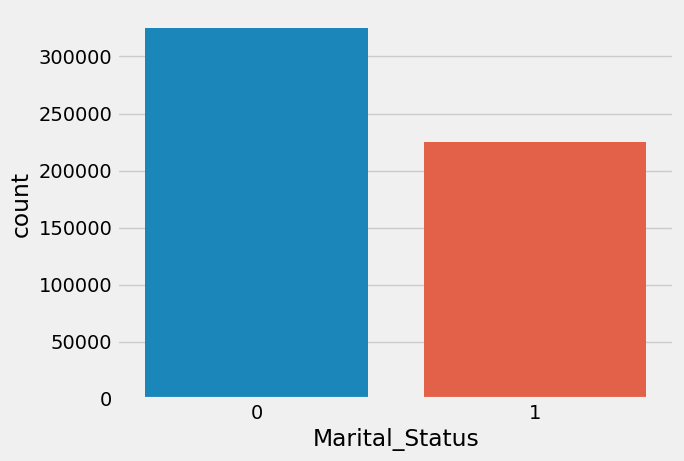

In [15]:
sns.countplot(x='Marital_Status' , data = df)
#This code creates a countplot of the 'Marital_Status' column in the dataframe 'df', showing the distribution of values in this column.

<Axes: xlabel='Occupation', ylabel='count'>

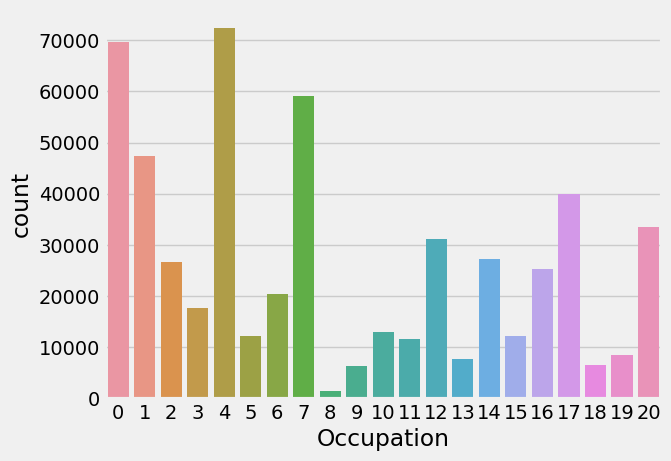

In [16]:
sns.countplot(x='Occupation', data=df)
#This code creates a countplot of the 'Occupation' column in the dataframe 'df', showing the distribution of values in this column.

<Axes: xlabel='Product_Category_1', ylabel='count'>

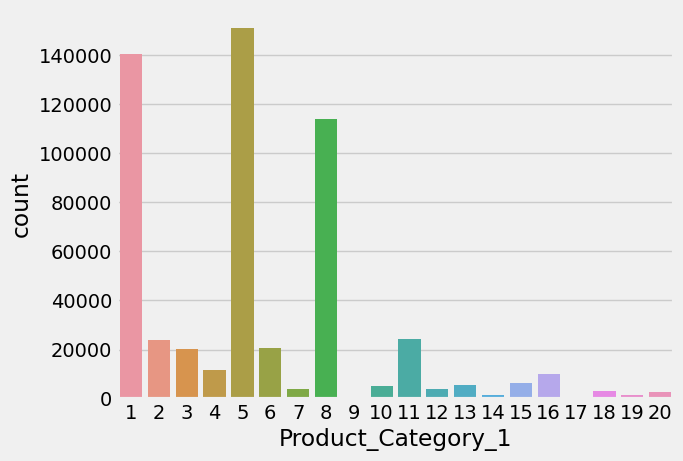

In [17]:
sns.countplot(x='Product_Category_1' , data = df)
#This code creates a countplot of the 'Product_Category_1' column in the dataframe 'df', showing the distribution of values in this column.

<Axes: xlabel='Product_Category_2', ylabel='count'>

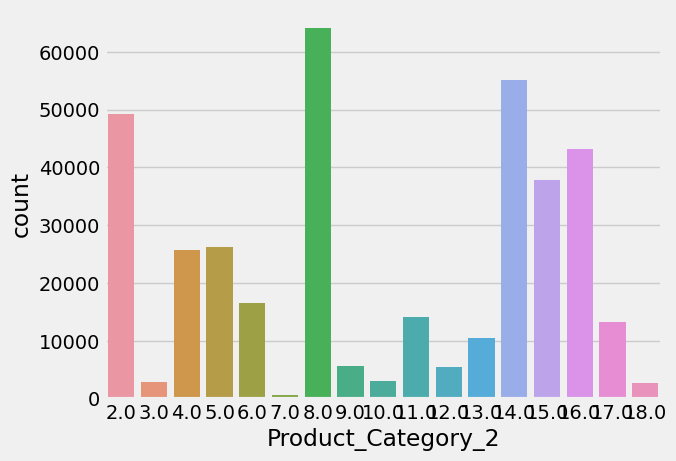

In [18]:
sns.countplot(x='Product_Category_2' , data=df)
#This code creates a countplot of the 'Product_Category_2' column in the dataframe 'df', showing the distribution of values in this column.

<Axes: xlabel='Product_Category_3', ylabel='count'>

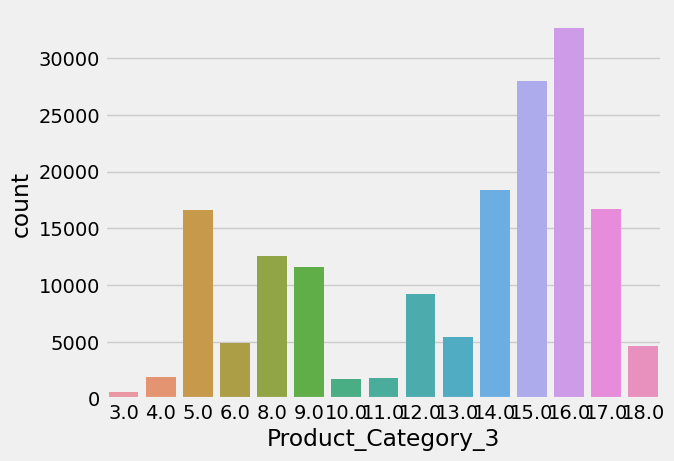

In [19]:
sns.countplot(x='Product_Category_3',data=df)
#This code creates a countplot of the 'Product_Category_3' column in the dataframe 'df', showing the distribution of values in this column.

<Axes: xlabel='City_Category', ylabel='count'>

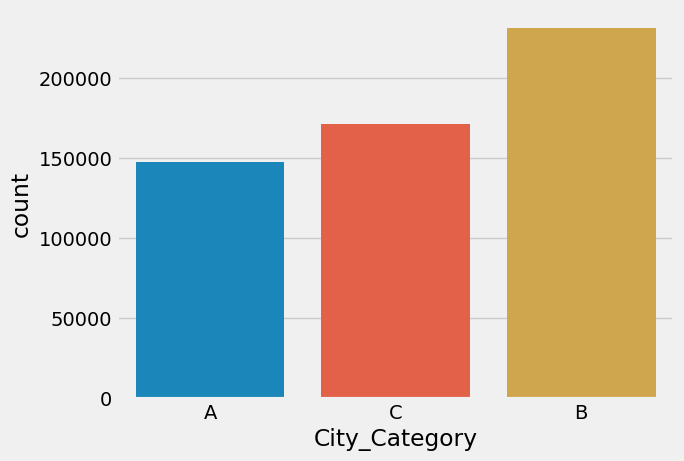

In [20]:
sns.countplot(x='City_Category' , data=df)
#This code creates a countplot of the 'City_Category' column in the dataframe 'df', showing the distribution of values in this column.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

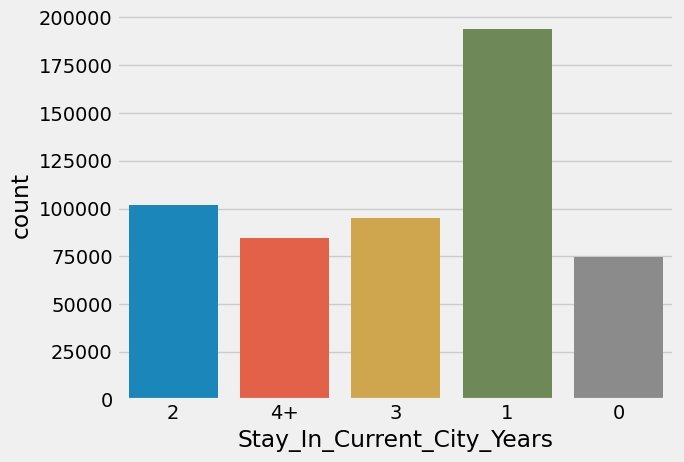

In [21]:
sns.countplot(x='Stay_In_Current_City_Years' , data=df)
#This code creates a countplot of the 'Stay_In_Current_City_Years' column in the dataframe 'df', showing the distribution of values in this column.

In [ ]:
sns.countplot(x='User_ID' , data=df)
sns.countplot(x='Product_ID' , data=df)
# we also import this but it is not necessary 


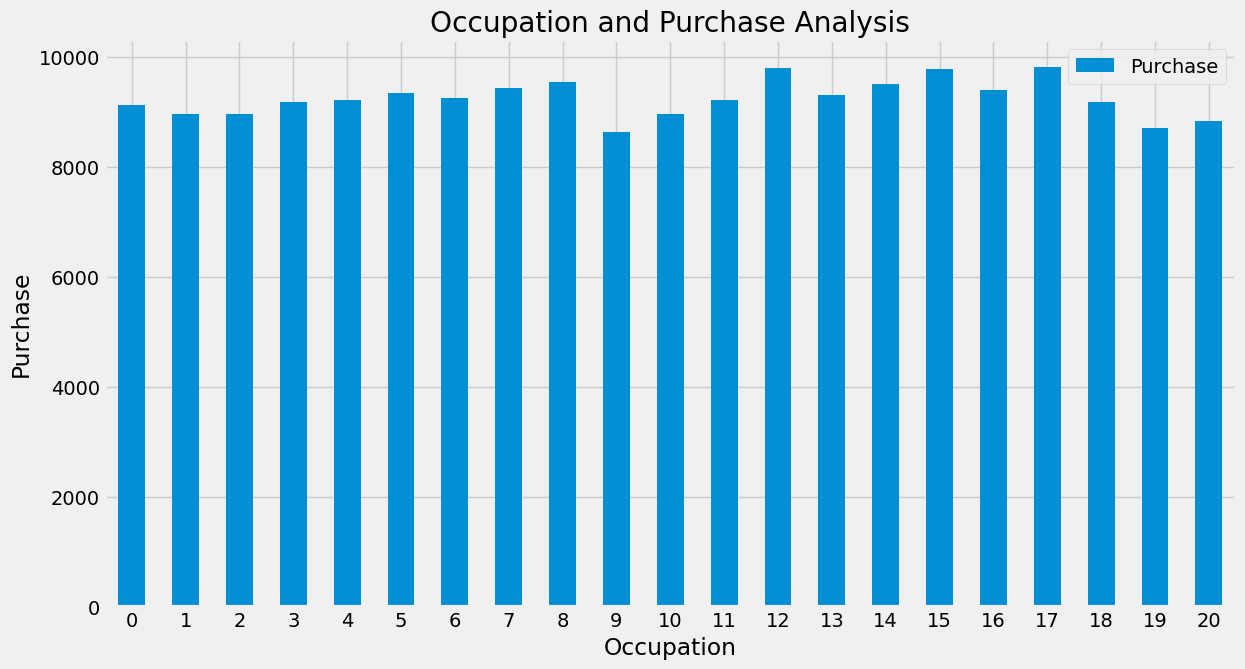

In [22]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
#This code creates a pivot table with the average purchase amount for each occupation category and then plots a bar chart to show the results.
#. The x-axis denotes profession types, while the y-axis represents average purchase amount. 
# The figure is named "Occupation and Purchase Analysis," and the x-axis labels are rotated at 0 degrees for improved clarity.

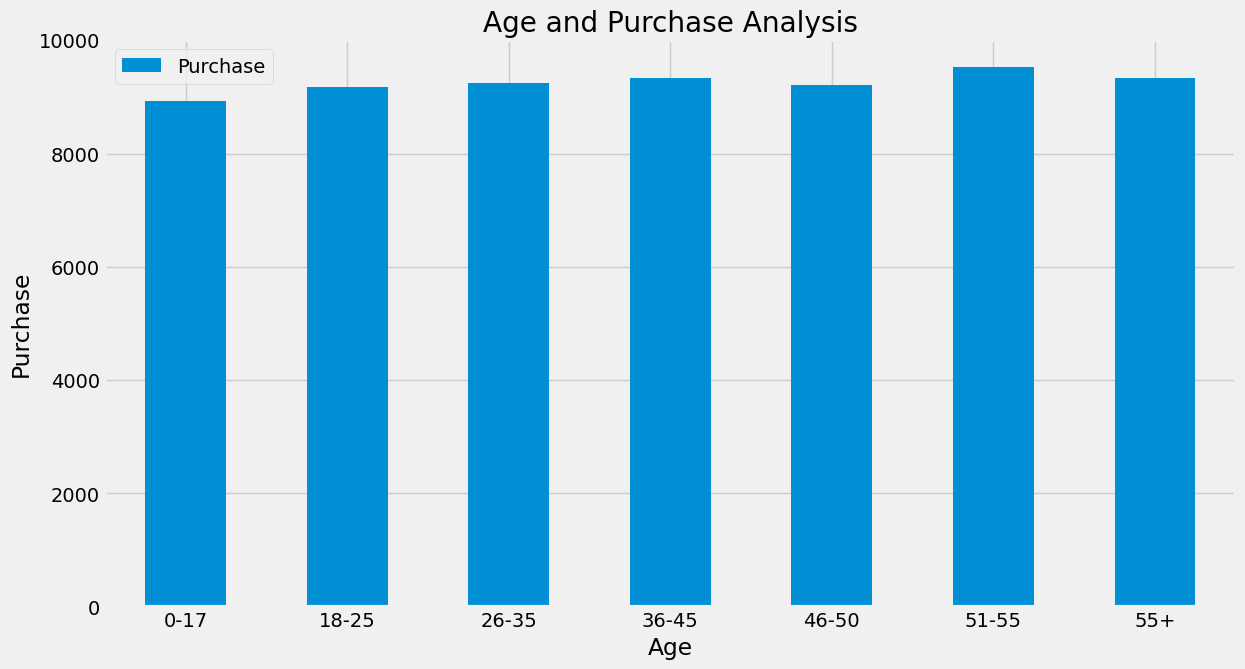

In [23]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
#This code creates a pivot table that shows the mean purchase values for each age group in the 'Age' column of the dataframe.
#It then creates a bar plot to visualize the relationship between age and purchase.
# The x-axis shows the age groups, and the y-axis shows the mean purchase values for each age group.


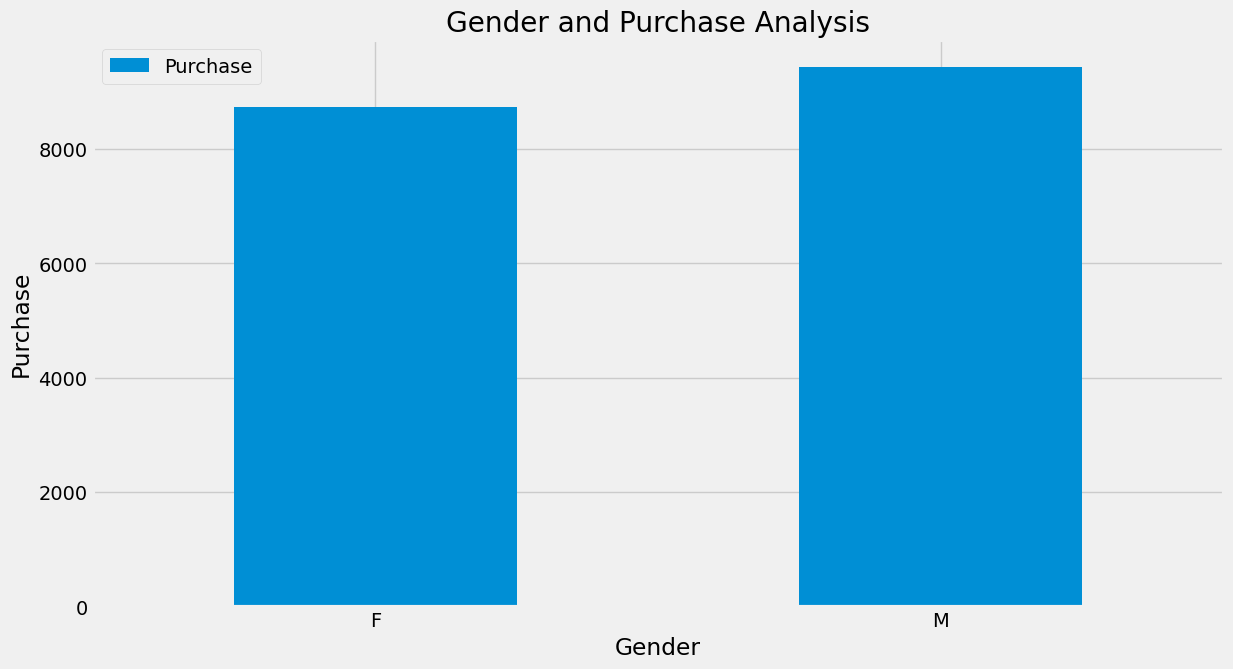

In [24]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

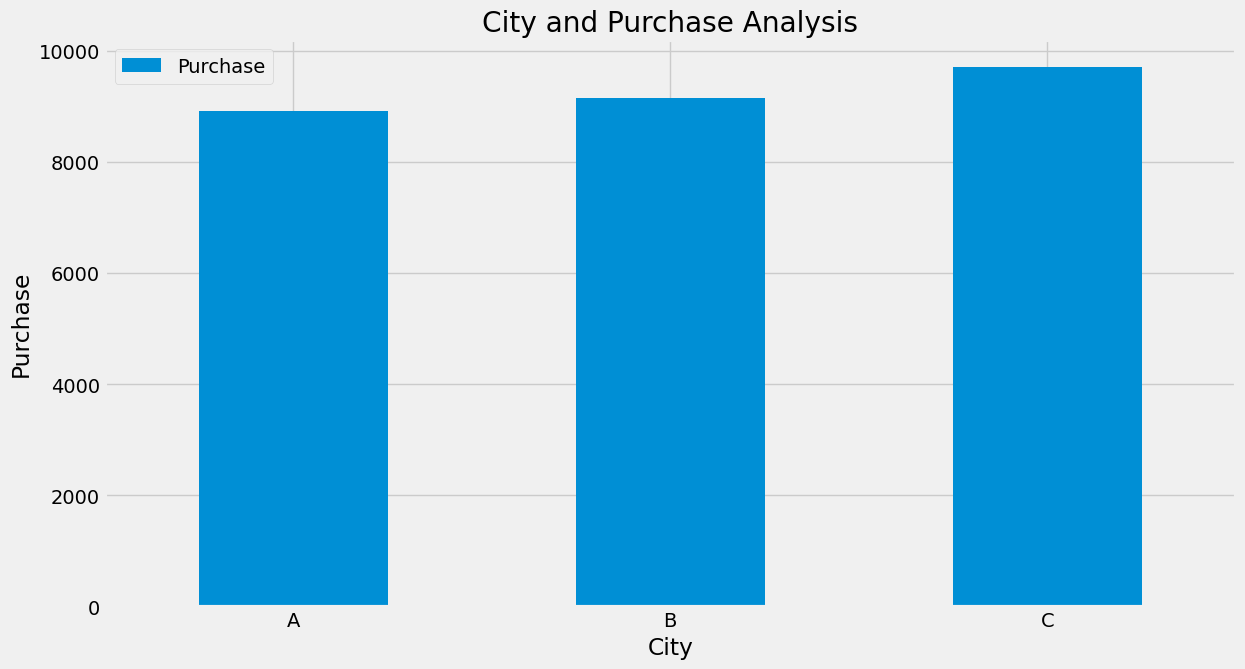

In [25]:
city_plot = df.pivot_table(index='City_Category', values='Purchase', aggfunc=np.mean)
city_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('City')
plt.ylabel("Purchase")
plt.title("City and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
#This code creates a bar plot to analyze the relationship between gender and purchase. 
# It first creates a pivot table where the index is set as 'Gender' and the values are set as 'Purchase',
# and then calculates the mean purchase value for each gender. 
# The resulting plot shows the average purchase value for each gender as a bar, 
# with the x-axis labeled as 'Gender' and the y-axis labeled as 'Purchase'. 
# The plot helps to visually understand if there is a difference in purchase behavior between genders.

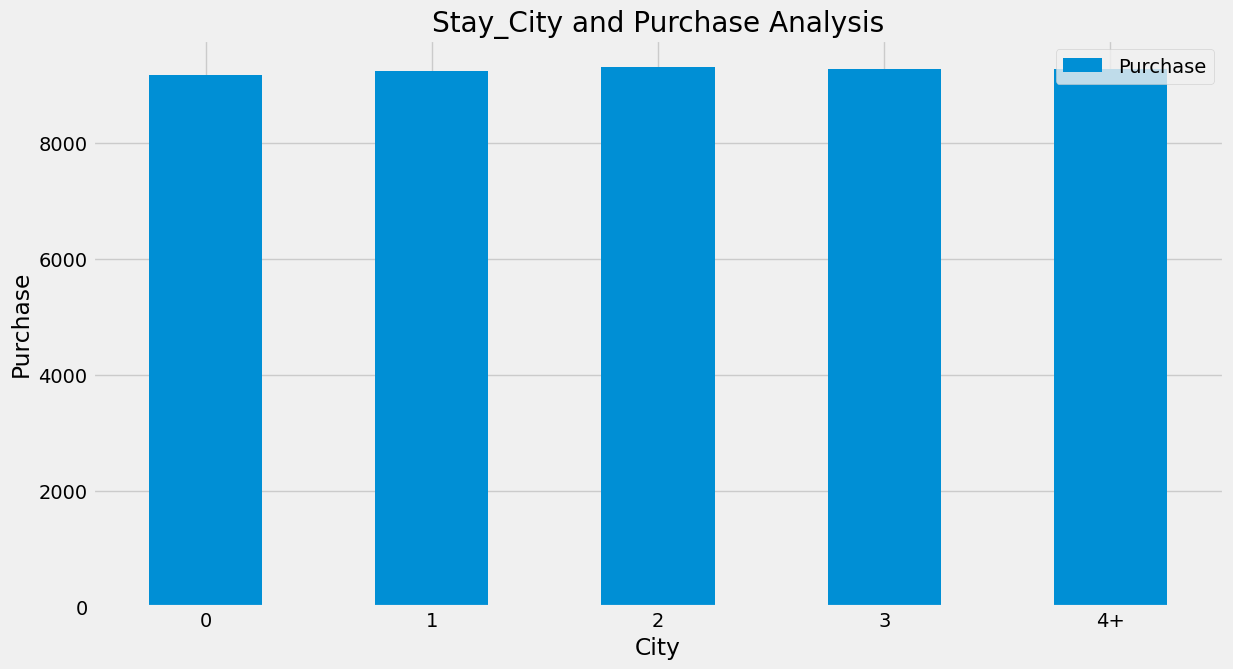

In [26]:
stay_city_plot = df.pivot_table(index='Stay_In_Current_City_Years', values='Purchase', aggfunc=np.mean)
stay_city_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('City')
plt.ylabel("Purchase")
plt.title("Stay_City and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
#This code creates a bar plot showing the mean purchase amount for each value of the "Stay_In_Current_City_Years" column in the dataframe.
# The pivot_table method is used to calculate the mean purchase amount for each unique value in the "Stay_In_Current_City_Years" column
#The resulting pivot table is then plotted using the plot method with a bar chart type,
# and the plot is customized with labels and a title using the xlabel, ylabel.

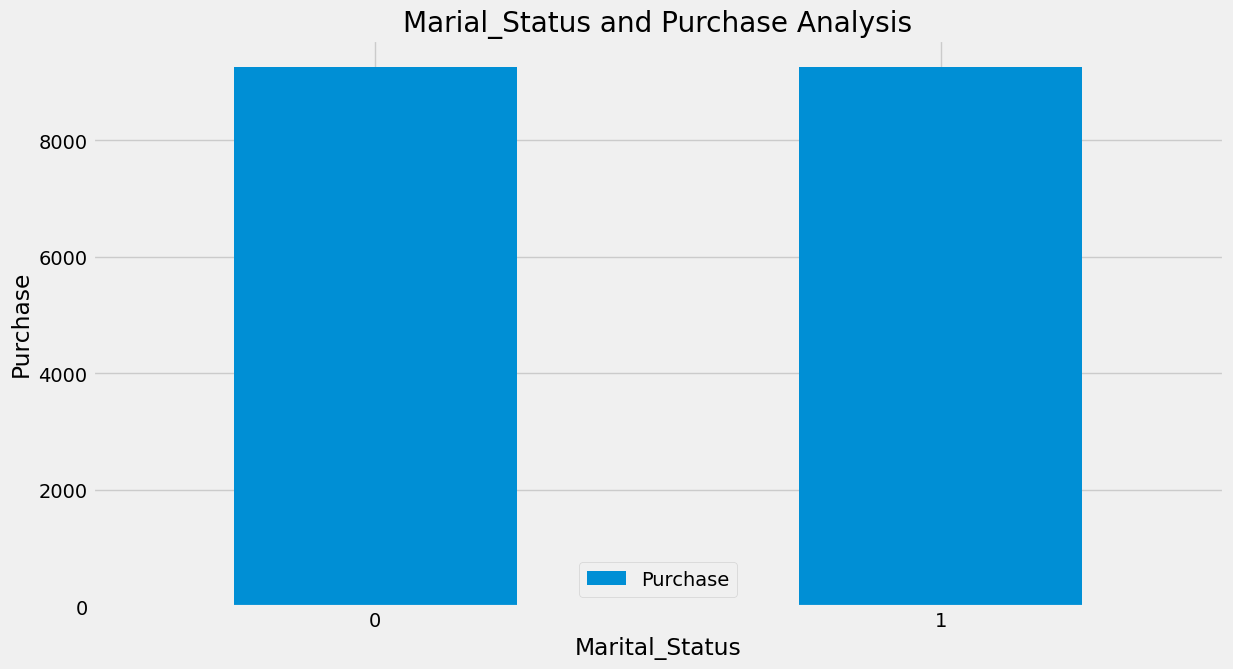

In [27]:
Marital_plot = df.pivot_table(index='Marital_Status', values='Purchase', aggfunc=np.mean)
Marital_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Marital_Status')
plt.ylabel("Purchase")
plt.title("Marial_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
#This code creates a bar plot to visualize the relationship between Marital Status and the average purchase amount.
# The pivot_table() function is used to calculate the mean purchase amount for each category of Marital Status, 
# The x-axis shows the categories of Marital Status and the y-axis shows the average purchase amount.

## Preprocessing the dataset

In [4]:
# check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")
#We filled the empty values ​​with valueless values ​​such as -2. 

In [6]:
df.isnull().sum()
#so there is no null value.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']] = scaler.fit_transform(df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']])
df.head()
#The first block of code uses scikit-learn's StandardScaler() function to apply standard scaling to the numerical features "Product_Category_1", "Product_Category_2", and "Product_Category_3".
# This is a type of feature scaling/normalization in which the features are transformed to have a zero mean and unit variance.
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()
#The second piece of code encodes the gender values with the use of a dictionary that translates 'F' to 0 and 'M' to 1.
# Using the apply() method, the lambda function applies this mapping to the dataframe's 'Gender' column. 
# This is a type of categorical encoding in which the category variable 'Gender' is converted into a numerical variable used in machine learning models.


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,-0.610809,-1.169715,-0.625224,8370
1,1000001,P00248942,0,0-17,10,A,2,0,-1.118912,-0.015026,1.623536,15200
2,1000001,P00087842,0,0-17,10,A,2,0,1.675656,-1.169715,-0.625224,1422
3,1000001,P00085442,0,0-17,10,A,2,0,1.675656,1.139663,-0.625224,1057
4,1000002,P00285442,1,55+,16,C,4+,0,0.659449,-1.169715,-0.625224,7969


In [8]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()
#Using the Scikit-learn LabelEncoder, this code encodes the columns "Age", "City_Category", and "Stay_In_Current_City_Years". 
# The LabelEncoder converts category values in each column to unique numerical values, allowing the data to be utilised in machine learning models.
# The encoded values are returned to the original columns.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,-0.610809,-1.169715,-0.625224,8370
1,1000001,P00248942,0,0,10,0,2,0,-1.118912,-0.015026,1.623536,15200
2,1000001,P00087842,0,0,10,0,2,0,1.675656,-1.169715,-0.625224,1422
3,1000001,P00085442,0,0,10,0,2,0,1.675656,1.139663,-0.625224,1057
4,1000002,P00285442,1,6,16,2,4,0,0.659449,-1.169715,-0.625224,7969


## Coorelation Matrix



<Axes: >

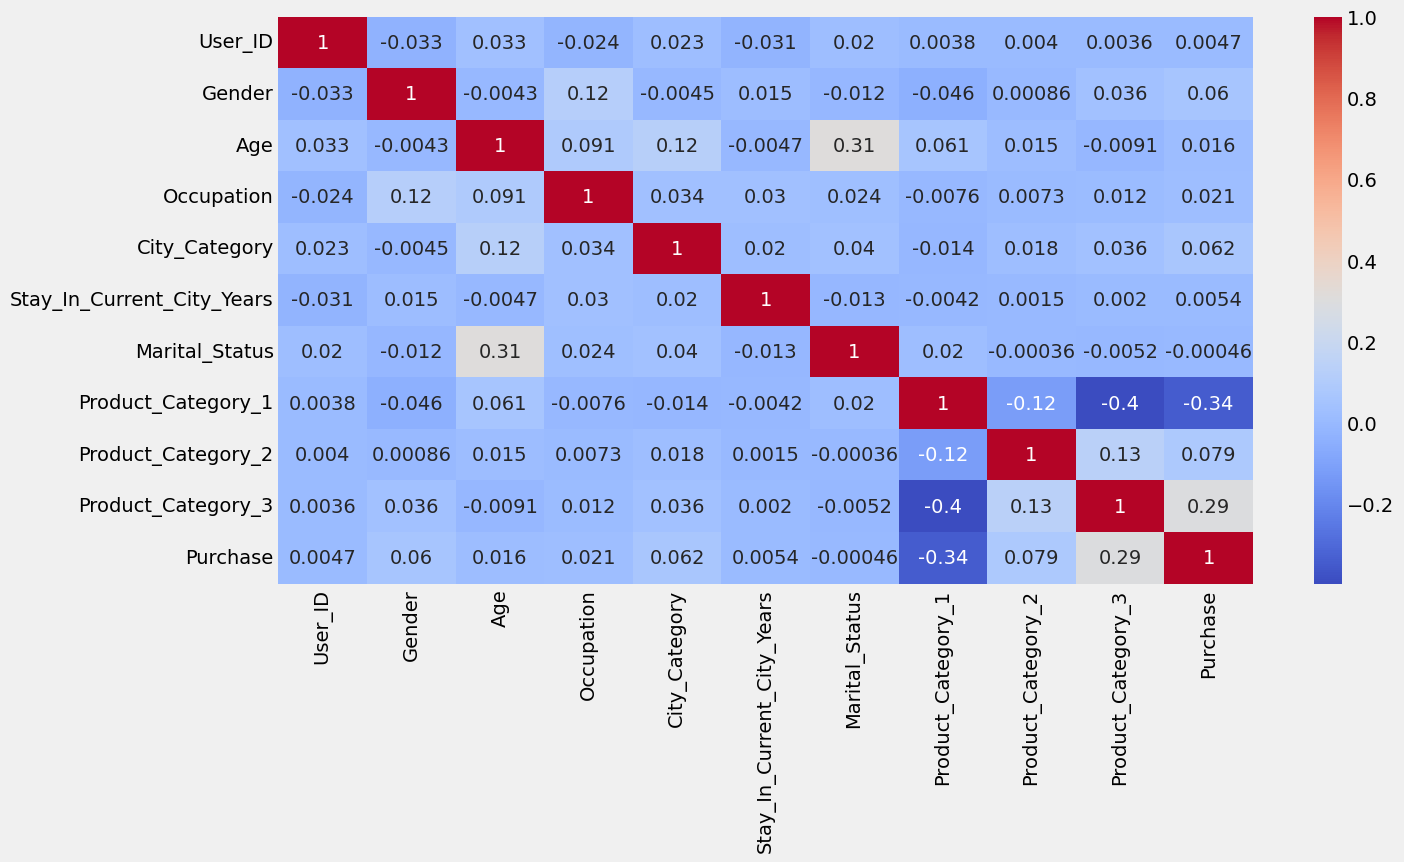

In [68]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#The corr() method is used to generate the correlation matrix of the numerical columns of the dataframe df,
# and the heatmap() function from the seaborn library is used to create a heatmap of the correlation matrix.
# The annot=True option adds the correlation coefficient values to the heatmap cells,
# while the cmap='coolwarm' argument determines the heatmap's color scheme.

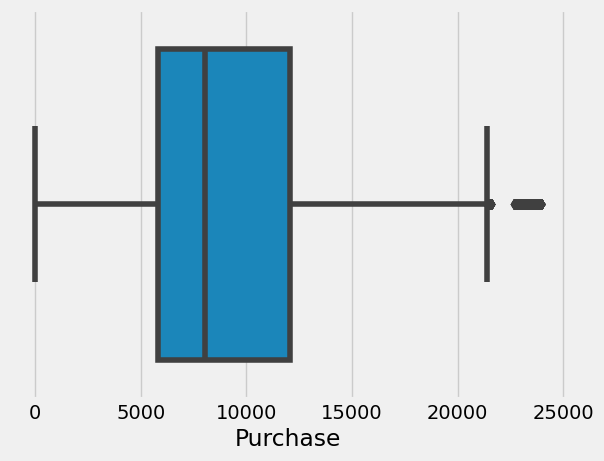

In [111]:
sns.boxplot(x=df['Purchase'])
plt.show()
#for dedecting the outliers best way is the box plot

In [143]:
"""from sklearn.linear_model import LinearRegression
unique_vals = df.apply(lambda x: len(x.unique()))
# calculate the 95th percentile for numeric columns
q95 = {}
for col in df.select_dtypes(include=[np.number]):
    q95[col] = np.percentile(df[col], 95)

# replace values above the 95th percentile with the 95th percentile value
for col in q95:
    df.loc[df[col] > q95[col], col] = q95[col]
sns.boxplot(x=df['Purchase'])
plt.show()"""
#This code handles outliers in the dataframe's numeric columns.
# First, it imports the scikit-learn LinearRegression model and counts the number of unique values in each column of the dataframe.
#Then it generates an empty dictionary q95 in order to contain the 95th percentile of each numeric column. 
# It loops through the numerical columns, computes the 95th percentile value with numpy's percentile function, and puts it in the q95 dictionary.
#The values above the 95th percentile in each numeric column are then replaced with the appropriate 95th percentile value. 
# This is accomplished through the use of the loc function and boolean indexing.
#Finally, it uses seaborn's boxplot function to plot a boxplot of the 'Purchase' column after outlier removal.





"from sklearn.linear_model import LinearRegression\nunique_vals = df.apply(lambda x: len(x.unique()))\n# calculate the 95th percentile for numeric columns\nq95 = {}\nfor col in df.select_dtypes(include=[np.number]):\n    q95[col] = np.percentile(df[col], 95)\n\n# replace values above the 95th percentile with the 95th percentile value\nfor col in q95:\n    df.loc[df[col] > q95[col], col] = q95[col]\nsns.boxplot(x=df['Purchase'])\nplt.show()"

## Input Split

In [9]:
df.head()
#show the first five rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,-0.610809,-1.169715,-0.625224,8370
1,1000001,P00248942,0,0,10,0,2,0,-1.118912,-0.015026,1.623536,15200
2,1000001,P00087842,0,0,10,0,2,0,1.675656,-1.169715,-0.625224,1422
3,1000001,P00085442,0,0,10,0,2,0,1.675656,1.139663,-0.625224,1057
4,1000002,P00285442,1,6,16,2,4,0,0.659449,-1.169715,-0.625224,7969


In [10]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']
#By removing the columns User_ID, Product_ID, and Purchase from the original df, this code generates the input features matrix X and the target variable y.
#All of the information that will be utilized to estimate the Purchase amount is contained in the variable X. 
# These are the independent variables, and they include all of the remaining columns from the original df.
#The variable y is the goal variable or the dependent variable. It contains the original df's Purchase column. 
# The purpose is to forecast the target variable y using the characteristics in X.


## Model Training

In [11]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))
    
    


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3) 
#This code imports the necessary libraries  and split the datasets which question wants us.


In [ ]:
x_train.describe().T

Results
MSE: 4624.547078823614
CV Score: 4625.252945835688
Results
MSE: 4624.547078823614
CV Score: 4625.252945835688


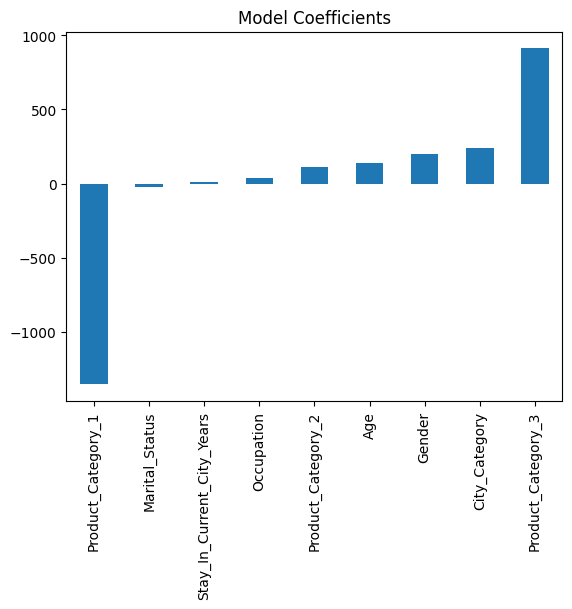

In [13]:
from sklearn.linear_model import LinearRegression
# Define the pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
# Define the hyperparameters to tune
parameters = {
    'regressor__copy_X': [True],
    'regressor__fit_intercept': [True],
    'regressor__positive': [False],
    'regressor__n_jobs': [1]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
# Fit the GridSearchCV object to the data
grid_search.fit(X, y)
# Predict on the test set and print the test score
grid_search.best_estimator_.fit(x_train, y_train)
y_pred = grid_search.best_estimator_.predict(x_test)
train(grid_search.best_estimator_, X, y)
coef = pd.Series(grid_search.best_estimator_.named_steps['regressor'].coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
train(grid_search.best_estimator_, X, y)


In [25]:
model = KNeighborsRegressor()
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])
parameters_knn = {'model__n_neighbors': range(1, 10)}
grid_search_knn = GridSearchCV(pipeline_knn, parameters_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(x_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_train = best_knn.predict(x_train)
y_pred_test = best_knn.predict(x_test)

print("Train score: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test score: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))



Train score:  2991.628068091285
Test score:  3572.587116987049


Results
MSE: 3378.141702362163
CV Score: 3338.951147983014


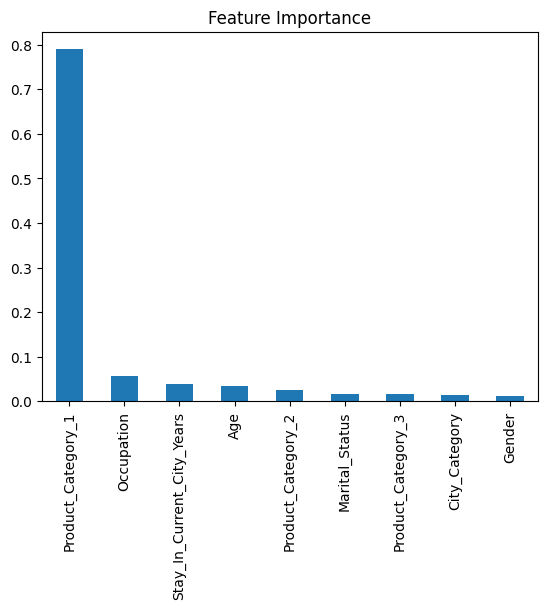

In [16]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

# Define the hyperparameters to tune
parameters = {
    'regressor__max_depth': [2, 5, 10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Predict on the test set and print the test score
grid_search.best_estimator_.fit(x_train, y_train)
y_pred = grid_search.best_estimator_.predict(x_test)

# On a given dataset, this function does a decision tree regression analysis. 
# The first step is to build a decision tree regression model that does not include any hyperparameter adjustment. 
# The model is then fitted to the data using the train() method.
# Following that, a feature importance plot is generated using the model's feature_importances_
# .After that, a pipeline is built to normalize the data and fit the decision tree regression model.
# A dictionary of hyperparameters is produced, 
# and a GridSearchCV object is built to search for the optimal combination of hyperparameters using cross-validation.
# The scoring parameter is set to 'neg_mean_squared_error,' which signifies that the negative mean squared error is the evaluation metric used for hyperparameter tuning.


Results
MSE: 2859.8488599702355
CV Score: 2855.5905383813347


<Axes: title={'center': 'Feature Importance'}>

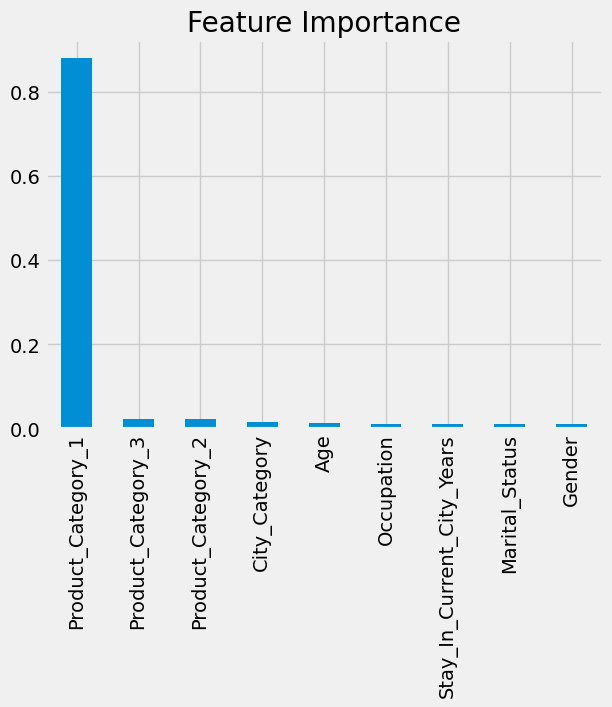

In [76]:
import xgboost as xgb

# Define the XGBoost model
model = xgb.XGBRegressor()
# Define the hyperparameters to tune
parameters = {
    'max_depth': [2, 5, 10],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 200],
}
# Define the GridSearchCV object
grid_search = GridSearchCV(model, parameters, cv=8, scoring='neg_mean_squared_error')
# Fit the GridSearchCV object to the data
grid_search.fit(X, y)
# Fit the best estimator to the training data
grid_search.best_estimator_.fit(x_train, y_train)
# Predict on the test set and print the test score
y_pred = grid_search.best_estimator_.predict(x_test)
train(grid_search.best_estimator_, X, y)
# Plot the feature importances
features = pd.Series(grid_search.best_estimator_.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [85]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

# Create a pipeline with a random forest regressor
pipe = Pipeline([
    ('model', RandomForestRegressor(n_jobs=-1))
])

# Define the hyperparameters to tune
params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [2, 5],
}

# Create a grid search object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)


# Predict on the test set and print the test score
grid_search.best_estimator_.fit(x_train, y_train)
y_pred = grid_search.best_estimator_.predict(x_test)

test_score = np.sqrt(mean_squared_error(y_test, y_pred))
train(grid_search.best_estimator_, X, y)
coef = pd.Series(grid_search.best_estimator_.named_steps['model'].feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Model Coefficients')
train(grid_search.best_estimator_, X, y)





Results
MSE: 3194.0770038232185
CV Score: 3180.5476561931346


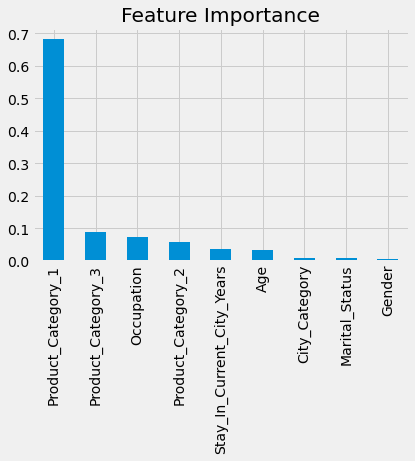

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')
#This code creates an ExtraTreesRegressor model and then trains it on the data using the train function.
# After that, it calculates the feature importance of each feature in the dataset using the feature_importances_ attribute
# of the ExtraTreesRegressor model and then plots them in a bar chart.